In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings(action="ignore")


In [3]:
data= pd.read_csv("./CC GENERAL.csv")

data.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
print(data.shape)

(8950, 18)


In [10]:
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [13]:
def get_summary_df(df):
    summary_df = pd.DataFrame(data=df.dtypes, columns=['dtypes'])
    # Covert the index into a column of dataFrame. ColumnNames are the index.
    summary_df.reset_index(inplace=True)
    summary_df.rename(columns={'index':'colNames'}, inplace=True)
    df.isnull().sum()
    summary_df['n_missing_vals'] = df.isnull().sum().values
    summary_df['percentage_missing'] = (summary_df['n_missing_vals'] / df.shape[0]) * 100
    summary_df['n_unique_vals'] = df.nunique().values
    return summary_df

get_summary_df(data)

,colNames,dtypes,n_missing_vals,percentage_missing,n_unique_vals
0,CUST_ID,object,0,0.000000,8950
1,BALANCE,float64,0,0.000000,8871
2,BALANCE_FREQUENCY,float64,0,0.000000,43
3,PURCHASES,float64,0,0.000000,6203
4,ONEOFF_PURCHASES,float64,0,0.000000,4014
5,INSTALLMENTS_PURCHASES,float64,0,0.000000,4452
6,CASH_ADVANCE,float64,0,0.000000,4323
7,PURCHASES_FREQUENCY,float64,0,0.000000,47
8,ONEOFF_PURCHASES_FREQUENCY,float64,0,0.000000,47
9,PURCHASES_INSTALLMENTS_FREQUENCY,float64,0,0.000000,47


In [14]:
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].mean()
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=data['CREDIT_LIMIT'].mean()

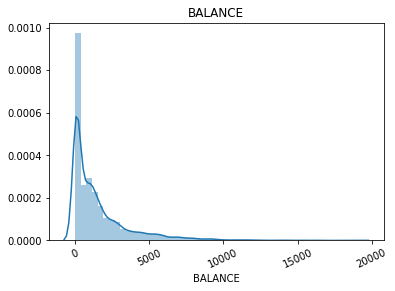

<Figure size 432x288 with 0 Axes>

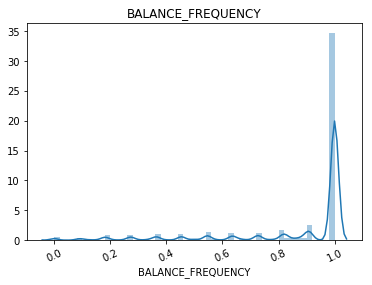

<Figure size 432x288 with 0 Axes>

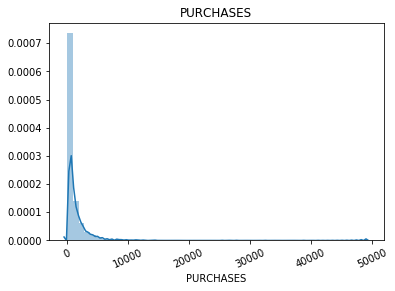

<Figure size 432x288 with 0 Axes>

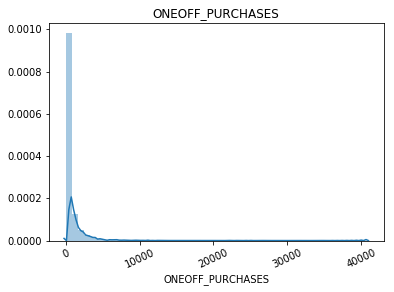

<Figure size 432x288 with 0 Axes>

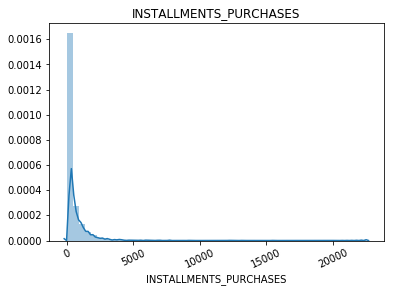

<Figure size 432x288 with 0 Axes>

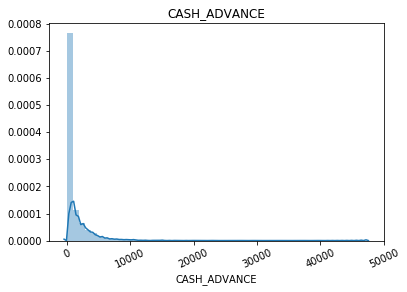

<Figure size 432x288 with 0 Axes>

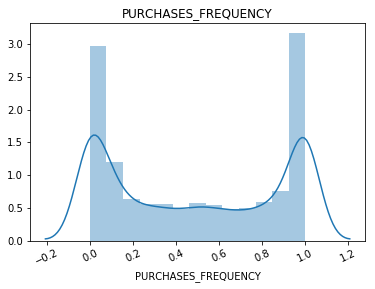

<Figure size 432x288 with 0 Axes>

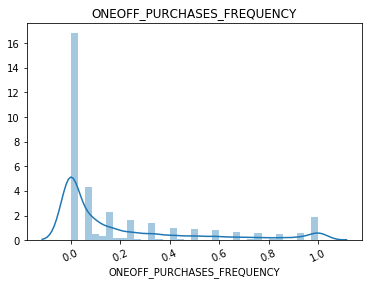

<Figure size 432x288 with 0 Axes>

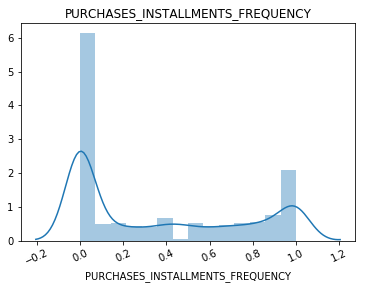

<Figure size 432x288 with 0 Axes>

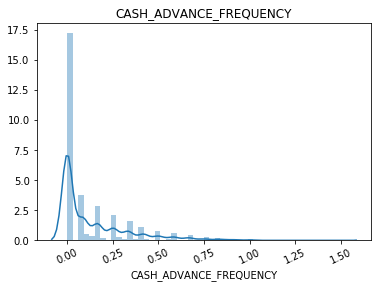

<Figure size 432x288 with 0 Axes>

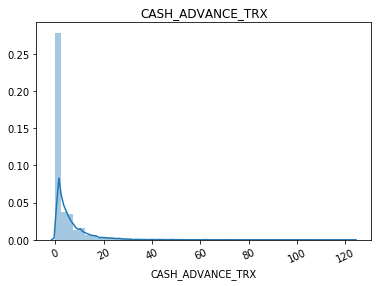

<Figure size 432x288 with 0 Axes>

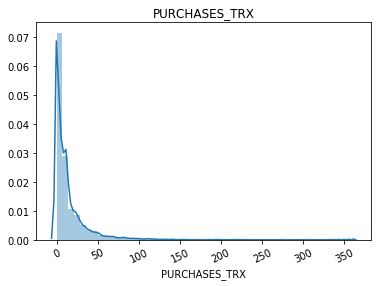

<Figure size 432x288 with 0 Axes>

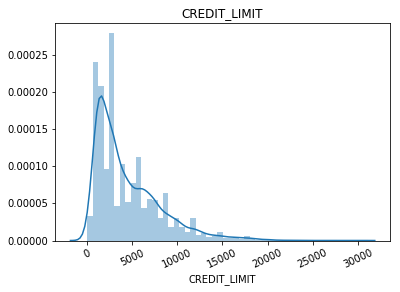

<Figure size 432x288 with 0 Axes>

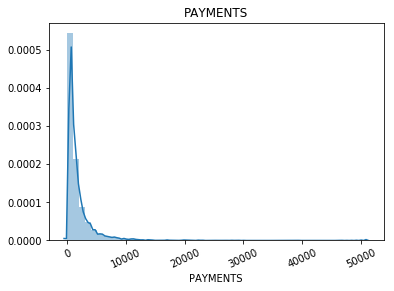

<Figure size 432x288 with 0 Axes>

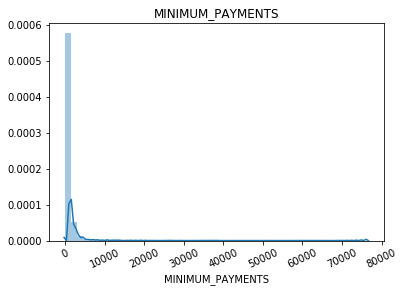

<Figure size 432x288 with 0 Axes>

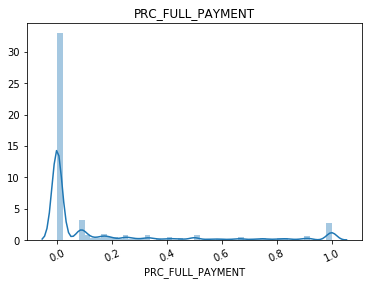

<Figure size 432x288 with 0 Axes>

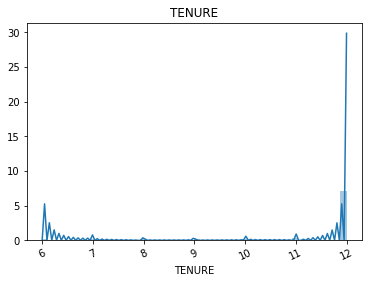

<Figure size 432x288 with 0 Axes>

In [17]:
def plot_features(df):
    for col_name in df.columns:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.set_title(col_name)
        if df.dtypes[col_name] in (np.object, np.bool) :
            g = sns.countplot(y=col_name, data=df)
            substrings = [s.get_text() for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
            plt.show()
            plt.savefig('./images/' + col_name + '.png')
            plt.close(fig) 
            plt.show()
        else:
            g = sns.distplot(df.loc[:, col_name])
            plt.xticks(rotation=25)
            plt.show()
            plt.savefig('./images/' + col_name + '.png')
            plt.close(fig)

plot_features(data.drop(columns=['CUST_ID'], inplace=False))

### Discretize features with long tail distribution

In [18]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    Range = c + '_RANGE'
    data[Range] = 0        
    data.loc[((data[c] > 0) & (data[c] <= 500)), Range] = 1
    data.loc[((data[c] > 500) & (data[c] <= 1000)), Range] = 2
    data.loc[((data[c] > 1000) & (data[c] <= 3000)), Range] = 3 
    data.loc[((data[c] > 3000) & (data[c] <= 5000)), Range] = 4
    data.loc[((data[c] > 5000) & (data[c] <= 10000)), Range] = 5
    data.loc[((data[c] > 10000)), Range] = 6

In [20]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:
    Range = c + '_RANGE'
    data[Range] = 0
    data.loc[((data[c] > 0) & (data[c] <= 0.1)), Range] = 1
    data.loc[((data[c] > 0.1) & (data[c] <= 0.2)), Range] = 2
    data.loc[((data[c] > 0.2) & (data[c] <= 0.3)), Range] = 3
    data.loc[((data[c] > 0.3) & (data[c] <= 0.4)), Range] = 4
    data.loc[((data[c] > 0.4) & (data[c] <= 0.5)), Range] = 5
    data.loc[((data[c] > 0.5) & (data[c] <= 0.6)), Range] = 6
    data.loc[((data[c] > 0.6) & (data[c] <= 0.7)), Range] = 7
    data.loc[((data[c] > 0.7) & (data[c] <= 0.8)), Range] = 8
    data.loc[((data[c] > 0.8) & (data[c] <= 0.9)), Range] = 9
    data.loc[((data[c] > 0.9) & (data[c] <= 1.0)), Range] = 10

In [21]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in columns:
    Range = c + '_RANGE'
    data[Range] = 0
    data.loc[((data[c] > 0) & (data[c] <= 5)), Range] = 1
    data.loc[((data[c] > 5) & (data[c] <= 10)), Range] = 2
    data.loc[((data[c] > 10) & (data[c] <= 15)), Range] = 3 
    data.loc[((data[c] > 15) & (data[c] <= 20)), Range] = 4
    data.loc[((data[c] > 20) & (data[c] <= 30)), Range] = 5
    data.loc[((data[c] > 30) & (data[c] <= 50)), Range] = 6
    data.loc[((data[c] > 50) & (data[c] <= 100)), Range] = 7
    data.loc[((data[c] > 100)), Range] = 8

In [22]:
data.drop(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

X = np.asarray(data)

In [23]:
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(8950, 17)

In [24]:
n_clusters = 30
cost = []
for i in range(1, n_clusters):
    kmean = KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)  

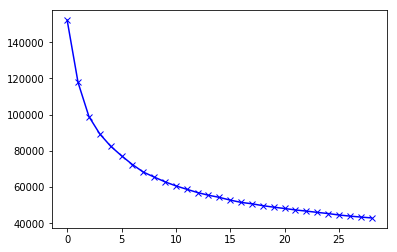

In [25]:
plt.plot(cost, 'bx-')

In [26]:
kmean = KMeans(6)
kmean.fit(X)
labels = kmean.labels_

In [27]:
clusters = pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,cluster
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0,3
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1,0
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0,5
3,12,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1,3
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0,3


### Interpretaion of Clusters

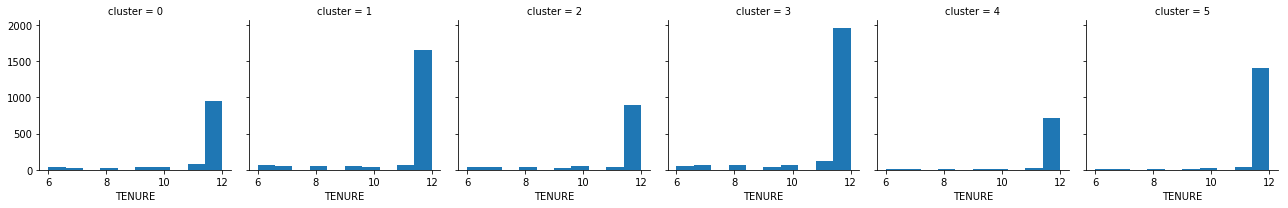

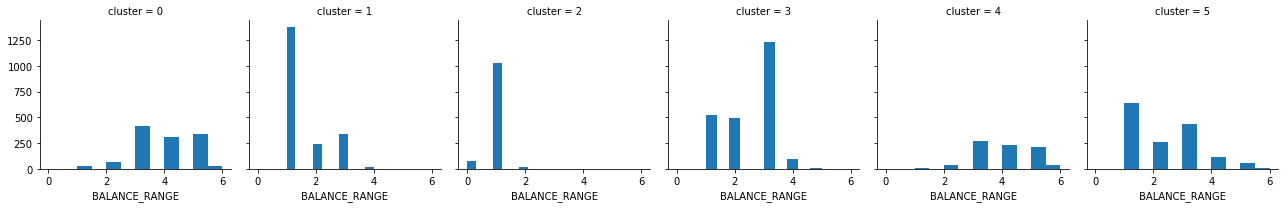

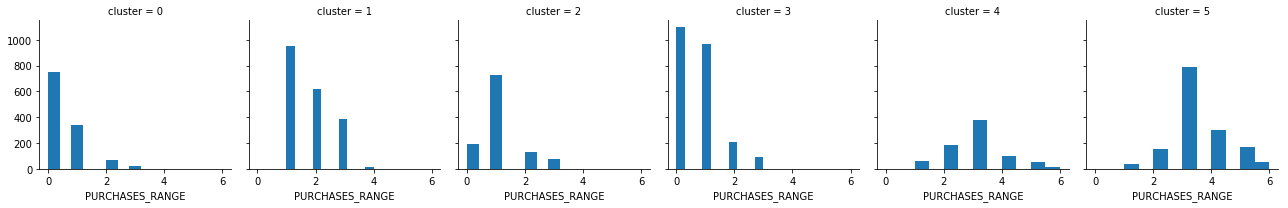

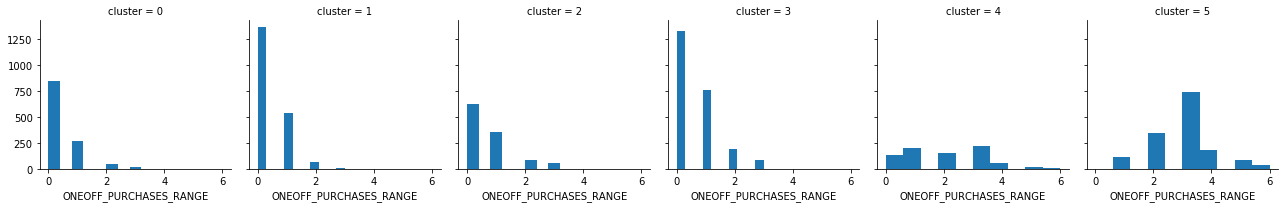

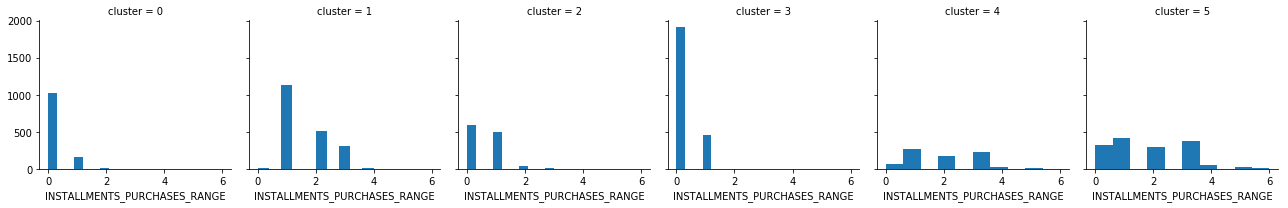

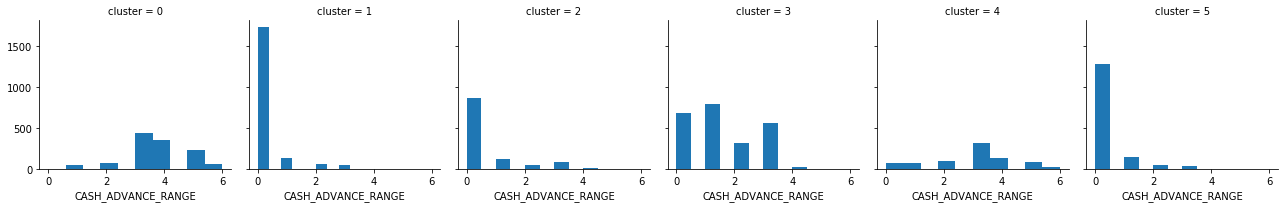

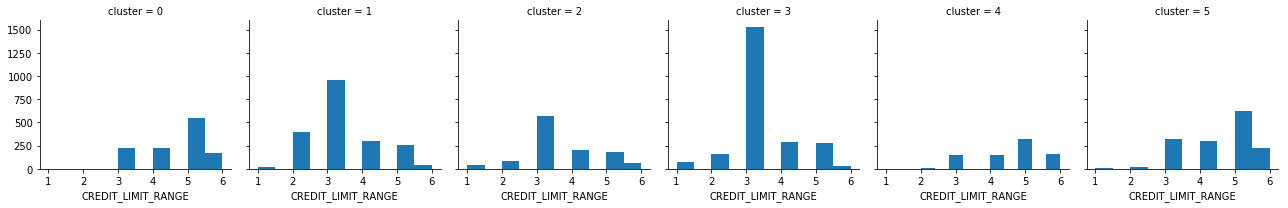

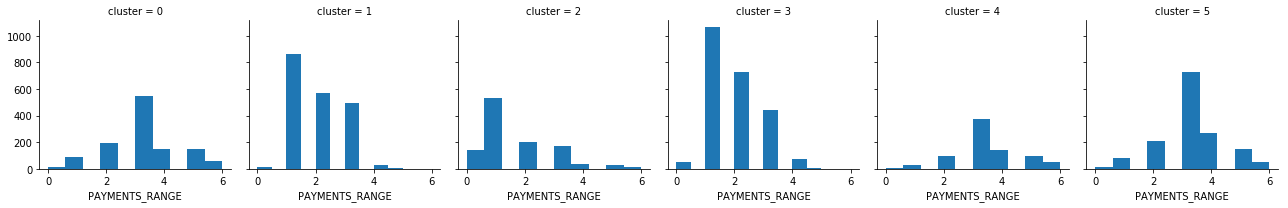

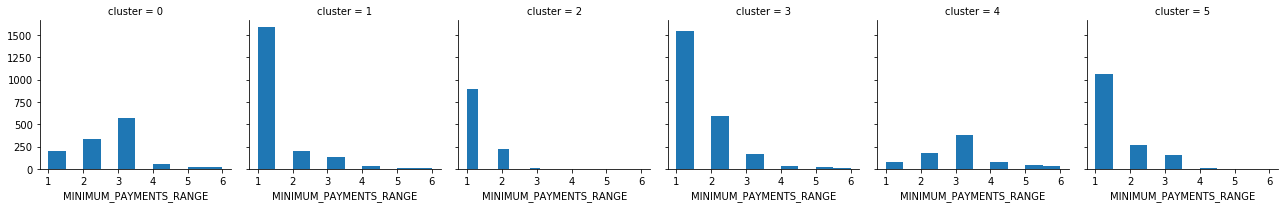

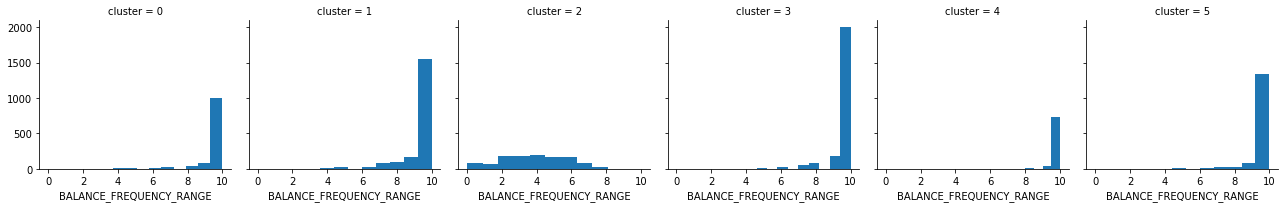

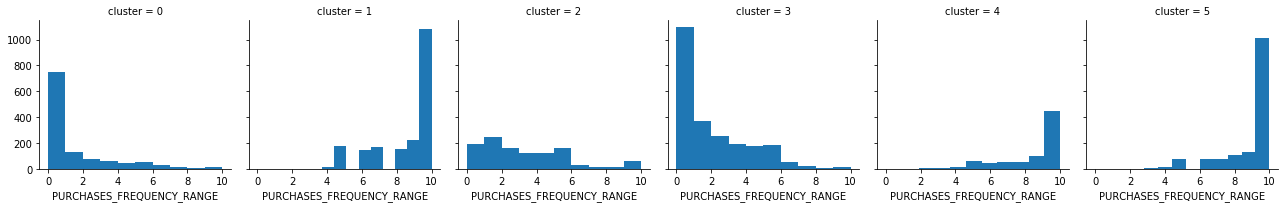

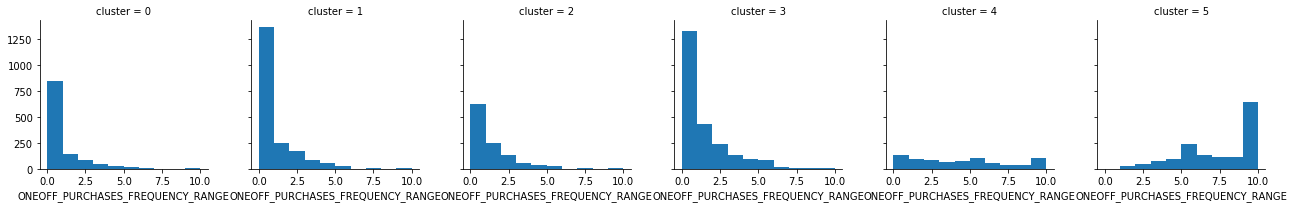

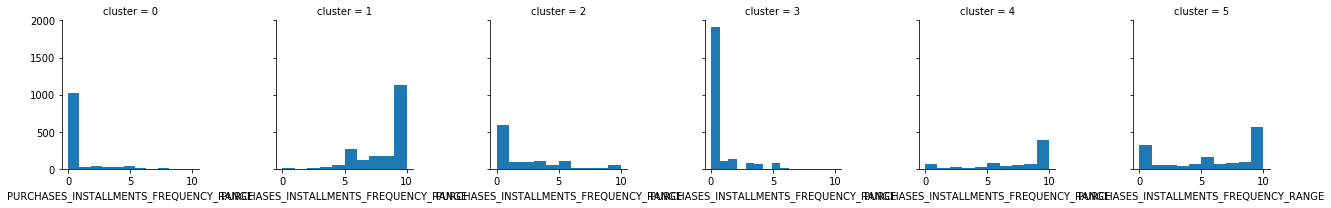

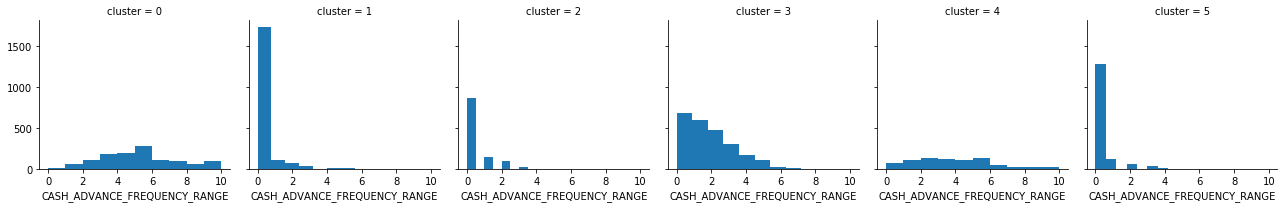

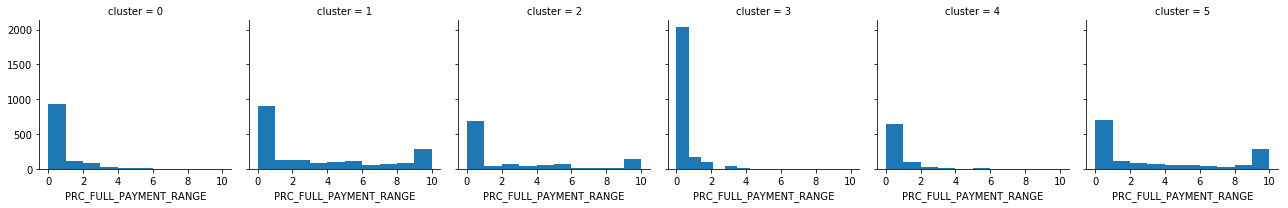

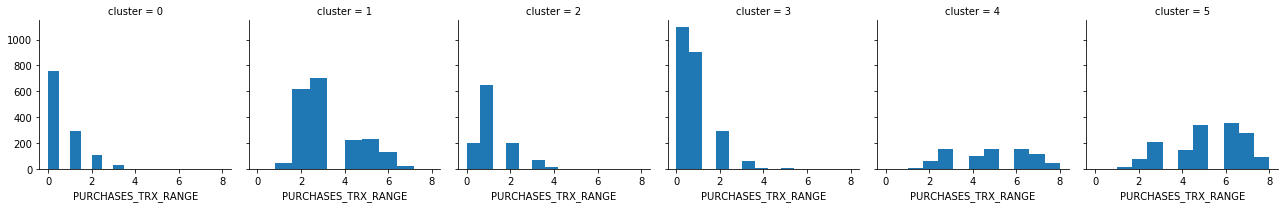

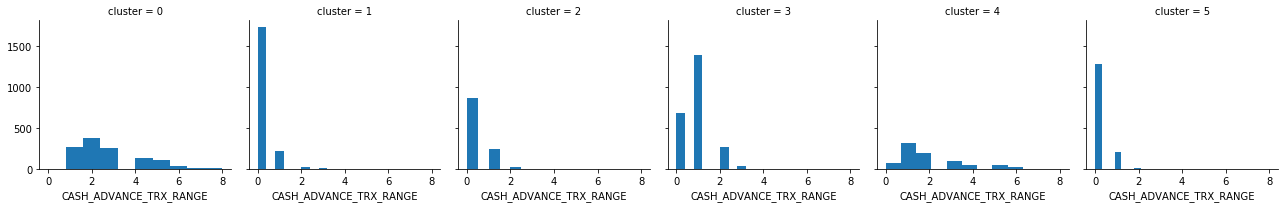

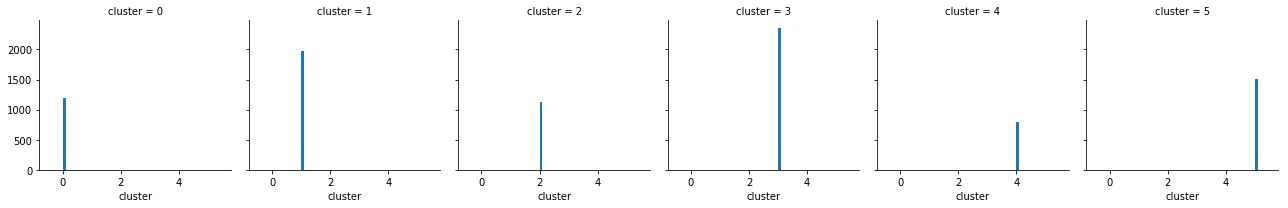

In [28]:
for c in clusters:
    grid = sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

### Clusters:

* Cluster0: People who don't spend much money and who have average to high credit limit

* Cluster1: High spenders with high credit limit who make expensive purchases

* Cluster2: People with average to high credit limit who make all type of purchases

* Cluster3: This group has more people with due payments who take advance cash more often

* Cluster4: People with high credit limit who take more cash in advance

* Cluster5 Less money spenders with average to high credit limits who purchases mostly in installments

    

    




In [29]:
dist = 1 - cosine_similarity(X)
pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

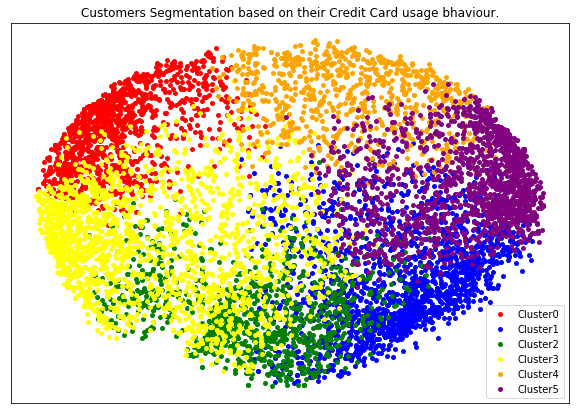

In [33]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

names = {0: 'Cluster0', 
         1: 'Cluster1', 
         2: 'Cluster2', 
         3: 'Cluster3', 
         4: 'Cluster4',
         5: 'Cluster5'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(10, 7)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()